In [63]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import cross_validate
import time
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing, datasets
import mlrose_hiive as mlrose
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
os.chdir(r'C:/Users/xpj/Desktop/OMSCS/CS7641/HW/HW1')

In [21]:
def load_xy2():
    x = np.array(df_wine.values[:,0:-1])
    y = np.array(df_wine.values[:,-1])
    return x,y

def train_test2(size):  
    x,y = load_xy2()
    X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = size, random_state = 12345)
    return X_train, X_test, y_train, y_test

train_pct_sizes = np.linspace(.1, 0.9, 9)

df_wine = pd.read_csv("wineQualityReds.csv")
x, y = load_xy2()
X_train, X_test, y_train, y_test=train_test2(0.8)
X_train, X_val, y_train, y_val = train_test2(0.8)

#normalize
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [22]:
print(X_test_scaled)

[[0.30909091 0.58677686 0.34177215 ... 0.36842105 0.09259259 0.25      ]
 [0.18181818 0.5        0.11392405 ... 0.42105263 0.09876543 0.42857143]
 [0.45454545 0.53719008 0.15189873 ... 0.37719298 0.19135802 0.35714286]
 ...
 [0.09090909 0.44628099 0.         ... 0.57017544 0.15432099 0.80357143]
 [0.12727273 0.42975207 0.06329114 ... 0.57017544 0.27777778 0.39285714]
 [0.52727273 0.17355372 0.79746835 ... 0.34210526 0.25308642 0.5       ]]


In [69]:
learning_rates = np.linspace(0.01, 0.50, 10)
train_acc_backprop = np.zeros((len(learning_rates)))
time_backprop = np.zeros((len(learning_rates)))
test_acc_backprop= np.zeros((len(learning_rates)))
val_acc_backprop=np.zeros((len(learning_rates)))
val_loss_backprop=np.zeros((len(learning_rates)))
val_acc_backprop_best = 0.0

nn_model_backprop_best = mlrose.NeuralNetwork(hidden_nodes = [10,10], activation ='tanh', 
                                        algorithm ='gradient_descent', 
                                        max_iters = 1000, bias = True, is_classifier = True, 
                                        learning_rate = 0.00001, early_stopping = True, 
                                        max_attempts = 100, random_state = 2, curve = True)

for idx1, learning_rate in enumerate(learning_rates):
        nn_model_backprop = mlrose.NeuralNetwork(hidden_nodes = [10], activation ='tanh', 
                                        algorithm ='gradient_descent', 
                                        max_iters = 1000, bias = True, is_classifier = True, 
                                        learning_rate = learning_rate, early_stopping = True, 
                                        max_attempts = 100, random_state = 2, curve = True)

        start = time.time()
        nn_model_backprop.fit(X_train, y_train)
        end = time.time()
        time_backprop_current = end - start

        y_train_pred_backprop = nn_model_backprop.predict(X_train)
        y_train_accuracy_backprop = accuracy_score(y_train, y_train_pred_backprop)
        train_acc_backprop[idx1] = y_train_accuracy_backprop

        y_val_pred_backprop = nn_model_backprop.predict(X_val)
        y_val_accuracy_backprop = accuracy_score(y_val, y_val_pred_backprop)
        val_acc_backprop[idx1]= y_val_accuracy_backprop
        val_loss_backprop[idx1]= nn_model_backprop.loss

        y_test_pred_backprop = nn_model_backprop.predict(X_test)
        y_test_accuracy_backprop = accuracy_score(y_test, y_test_pred_backprop)
        test_acc_backprop[idx1] = y_test_accuracy_backprop
        time_backprop[idx1]= time_backprop_current
        
        print(learning_rate)
        print("y_val_accuracy_backprop",y_val_accuracy_backprop)
        print("nn_model_backprop loss",nn_model_backprop.loss)

        if y_val_accuracy_backprop > val_acc_backprop_best:
            nn_model_backprop_best = nn_model_backprop
            print("Learning Rate:", learning_rate)
            print("Time:", time_backprop_current)
            backprop_best_idx1 = idx1
            val_acc_backprop_best = y_val_accuracy_backprop





0.01
y_val_accuracy_backprop 0.5
nn_model_backprop loss 0.7202221795863767
Learning Rate: 0.01
Time: 2.944995164871216
0.06444444444444444
y_val_accuracy_backprop 0.475
nn_model_backprop loss 0.907051243107659
0.11888888888888888
y_val_accuracy_backprop 0.475
nn_model_backprop loss 0.907051243107659
0.17333333333333334
y_val_accuracy_backprop 0.475
nn_model_backprop loss 0.907051243107659
0.22777777777777777
y_val_accuracy_backprop 0.475
nn_model_backprop loss 0.907051243107659
0.2822222222222222
y_val_accuracy_backprop 0.475
nn_model_backprop loss 0.907051243107659
0.33666666666666667
y_val_accuracy_backprop 0.475
nn_model_backprop loss 0.907051243107659
0.3911111111111111
y_val_accuracy_backprop 0.475
nn_model_backprop loss 0.907051243107659
0.44555555555555554
y_val_accuracy_backprop 0.475
nn_model_backprop loss 0.907051243107659
0.5
y_val_accuracy_backprop 0.475
nn_model_backprop loss 0.907051243107659


In [70]:
print(val_acc_backprop)
print(val_loss_backprop)

[0.5   0.475 0.475 0.475 0.475 0.475 0.475 0.475 0.475 0.475]
[0.72022218 0.90705124 0.90705124 0.90705124 0.90705124 0.90705124
 0.90705124 0.90705124 0.90705124 0.90705124]


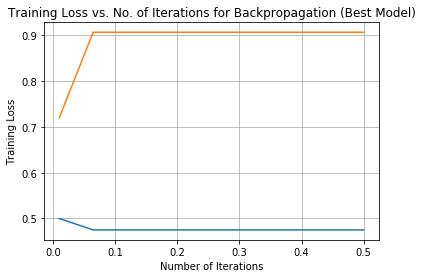

In [75]:
plt.figure()
# plt.figure(figsize=(15,7))
# index =range(0,1000,5)
learning_rates = np.linspace(0.01, 0.50, 10)
plt.plot(learning_rates,val_acc_backprop)
plt.plot(learning_rates,val_loss_backprop)
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. No. of Iterations for Backpropagation (Best Model)')
plt.savefig('nn_train_iterations_curve_backprop_best.png')

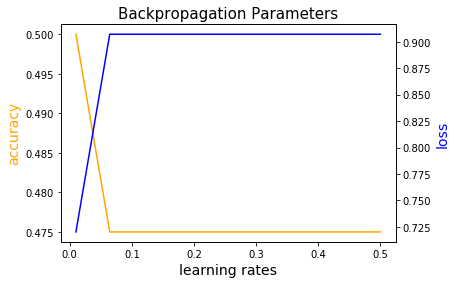

In [80]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(learning_rates, val_acc_backprop, color="orange")
# set x-axis label
ax.set_xlabel("learning rates",fontsize=14)
# set y-axis label
ax.set_ylabel("accuracy",color="orange",fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(learning_rates, val_loss_backprop,color="blue")
ax2.set_ylabel("loss",color="blue",fontsize=14)
plt.title("Backpropagation Parameters",fontsize=15)
plt.show()

Average Time 2.501800203323364
Time: [2.47099829 2.33999825 2.29699826 2.38100529 3.02000093]
Test Accuracy: 0.5
Confusion Matrix: [[160   0]
 [160   0]]
0.7202221795863767


<Figure size 432x288 with 0 Axes>

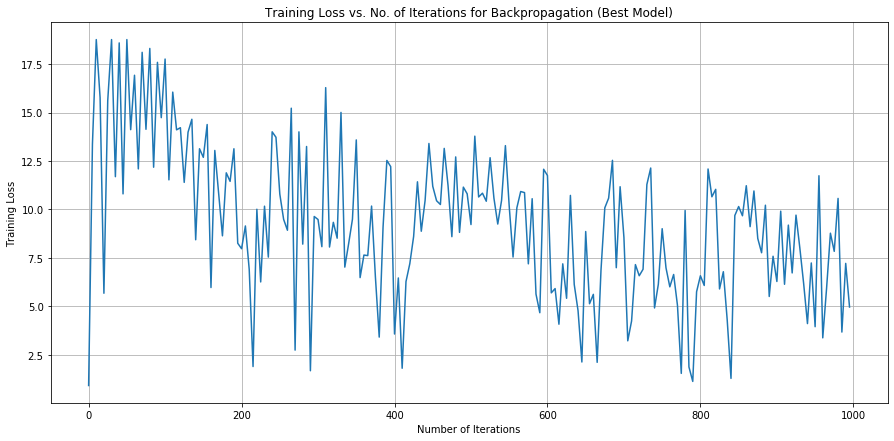

In [55]:
plt.figure()
plt.figure(figsize=(15,7))
index =range(0,1000,5)
plt.plot(index,-nn_model_backprop_best.fitness_curve[index])
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. No. of Iterations for Backpropagation (Best Model)')
plt.savefig('nn_train_iterations_curve_backprop_best.png')

y_test_pred_backprop = nn_model_backprop_best.predict(X_test)
confusion_matrix_backprop = confusion_matrix(y_test, y_test_pred_backprop)

print("Average Time", np.mean(time_backprop))
print("Time:", time_backprop)
print("Test Accuracy:", test_acc_backprop[backprop_best_idx1])
print("Confusion Matrix:", confusion_matrix_backprop)

print(nn_model_backprop_best.loss)


In [105]:
learning_rates = np.linspace(0.01, 0.50, 5)
restarts = range(0,20,4)
train_acc_rhc = np.zeros((len(learning_rates),len(restarts)))
time_rhc = np.zeros((len(learning_rates),len(restarts)))
test_acc_rhc= np.zeros((len(learning_rates),len(restarts)))
val_acc_rhc=np.zeros((len(learning_rates),len(restarts)))
val_loss_rhc=np.zeros((len(learning_rates),len(restarts)))
val_acc_rhc_best = 0.0
val_loss_rhc_best = 1

nn_model_rhc_best = mlrose.NeuralNetwork(hidden_nodes = [10,10], activation = 'tanh', \
                                 algorithm = 'random_hill_climb', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.0001, \
                                 early_stopping = True, max_attempts = 100, \
                                 random_state = 2,curve = True)

for idx1, learning_rate in enumerate(learning_rates):
    for idx2, restart in enumerate(restarts):
        nn_model_rhc = mlrose.NeuralNetwork(hidden_nodes = [10,10], activation ='tanh', 
                                        algorithm ='random_hill_climb', 
                                        max_iters = 1000, bias = True, restarts = restart, is_classifier = True, 
                                        learning_rate = learning_rate, early_stopping = True, 
                                        max_attempts = 100, random_state = 2, curve = True)

        start = time.time()
        nn_model_rhc.fit(X_train, y_train)
        end = time.time()
        time_rhc_current = end - start

        y_train_pred_rhc = nn_model_rhc.predict(X_train)
        y_train_accuracy_rhc = accuracy_score(y_train, y_train_pred_rhc)
        train_acc_rhc[idx1][idx2] = y_train_accuracy_rhc

        y_val_pred_rhc = nn_model_rhc.predict(X_val)
        y_val_accuracy_rhc = accuracy_score(y_val, y_val_pred_rhc)
        val_acc_rhc[idx1][idx2]= y_val_accuracy_rhc
        val_loss_rhc[idx1][idx2]= nn_model_rhc.loss

        y_test_pred_rhc = nn_model_rhc.predict(X_test)
        y_test_accuracy_rhc = accuracy_score(y_test, y_test_pred_rhc)
        test_acc_rhc[idx1][idx2] = y_test_accuracy_rhc
        time_rhc[idx1][idx2]= time_rhc_current
        
        print(learning_rate,restart)
        print("y_val_accuracy_backprop",y_val_accuracy_rhc)
        print("nn_model_backprop loss",nn_model_rhc.loss)
        

        if (y_val_accuracy_rhc > val_acc_rhc_best) or (y_val_accuracy_rhc == val_acc_rhc_best and nn_model_rhc.loss<val_loss_rhc_best):
            nn_model_rhc_best = nn_model_rhc
            print("Learning Rate:", learning_rate)
            print("Restarts:", restart)
            print("Time:", time_rhc_current)
            rhc_best_idx1 = idx1
            rhc_best_idx2 = idx2
            val_acc_rhc_best = y_val_accuracy_rhc
            val_loss_rhc_best = nn_model_rhc.loss

0.01 0
y_val_accuracy_backprop 0.5
nn_model_backprop loss 0.6804589432750102
Learning Rate: 0.01
Restarts: 0
Time: 1.886012077331543
0.01 4
y_val_accuracy_backprop 0.50625
nn_model_backprop loss 0.679196044200486
Learning Rate: 0.01
Restarts: 4
Time: 10.826021909713745
0.01 8
y_val_accuracy_backprop 0.50625
nn_model_backprop loss 0.679196044200486
0.01 12
y_val_accuracy_backprop 0.50625
nn_model_backprop loss 0.679196044200486
0.01 16
y_val_accuracy_backprop 0.50625
nn_model_backprop loss 0.679196044200486
0.1325 0
y_val_accuracy_backprop 0.6
nn_model_backprop loss 0.6407555236154566
Learning Rate: 0.1325
Restarts: 0
Time: 1.8539965152740479
0.1325 4
y_val_accuracy_backprop 0.621875
nn_model_backprop loss 0.6350256658456983
Learning Rate: 0.1325
Restarts: 4
Time: 11.330531120300293
0.1325 8
y_val_accuracy_backprop 0.621875
nn_model_backprop loss 0.6350256658456983
0.1325 12
y_val_accuracy_backprop 0.61875
nn_model_backprop loss 0.6290500041202405
0.1325 16
y_val_accuracy_backprop 0.618

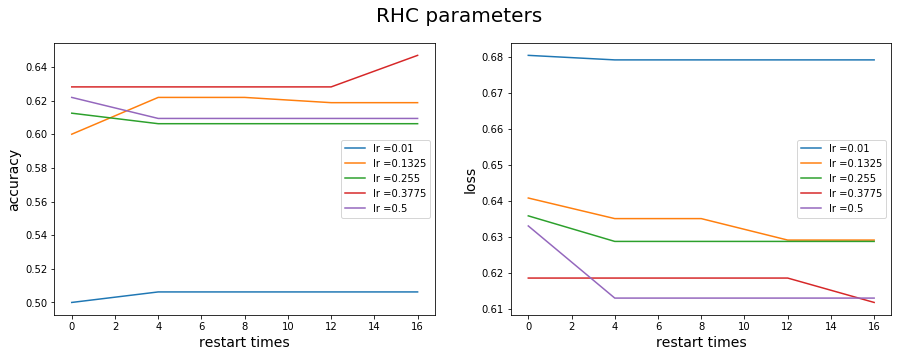

In [106]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('RHC parameters',fontsize=20)

learning_rates = np.linspace(0.01, 0.50, 5)
restarts = range(0,20,4)

ax1.plot(restarts, val_acc_rhc.T)
# set x-axis label
ax1.set_xlabel("restart times",fontsize=14)
# set y-axis label
ax1.set_ylabel("accuracy",fontsize=14)
ax1.legend(["lr =0.01","lr =0.1325","lr =0.255","lr =0.3775","lr =0.5"],loc = "middle left")



# make a plot with different y-axis using second axis object
ax2.plot(restarts, val_loss_rhc.T)
ax2.set_ylabel("loss",fontsize=14)
ax2.set_xlabel("restart times",fontsize=14)
ax2.legend(["lr =0.01","lr =0.1325","lr =0.255","lr =0.3775","lr =0.5"],loc = "middle left")


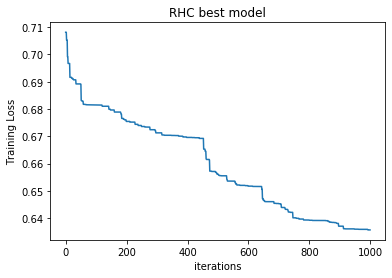

In [107]:
plt.figure()
plt.plot(nn_model_rhc_best.fitness_curve[:,0])
plt.xlabel('iterations')
plt.ylabel('Training Loss')
plt.title('RHC best model')
plt.savefig('nn_train_iterations_curve_rhc_best.png')

In [33]:
y_test_pred_rhc = nn_model_rhc_best.predict(X_test)
confusion_matrix_rhc = confusion_matrix(y_test, y_test_pred_rhc)

print("Average Time", np.mean(time_rhc))
print("Time:", time_rhc)
print("Test Accuracy:", test_acc_rhc[rhc_best_idx1][rhc_best_idx2])
print("Confusion Matrix:", confusion_matrix_rhc)

Average Time 15.143494958877563
Time: [[ 1.67899728  8.99716139 18.191468   22.71300554 33.68415904]
 [ 2.16799784  8.17685795 15.5774765  22.09399962 28.61663723]
 [ 1.46597338  8.20603466 14.1362021  20.08410382 27.87606144]
 [ 1.50632834  7.72124648 14.3465085  20.3411839  27.38900423]
 [ 1.52803016  8.74454188 14.41873121 20.28716254 28.63850093]]
Test Accuracy: 0.68125
Confusion Matrix: [[ 97  63]
 [ 39 121]]


In [108]:
learning_rates = np.linspace(0.01, 0.50, 5)
populations = [100, 200, 300]
train_acc_ga = np.zeros((len(learning_rates),len(populations)))
time_ga = np.zeros((len(learning_rates),len(populations)))
test_acc_ga= np.zeros((len(learning_rates),len(populations)))
val_acc_ga= np.zeros((len(learning_rates),len(populations)))
val_loss_ga= np.zeros((len(learning_rates),len(populations)))
val_acc_ga_best = 0.0
val_loss_ga_best = 100

nn_model_ga_best = mlrose.NeuralNetwork(hidden_nodes = [10,10], activation = 'tanh', \
                                 algorithm = 'genetic_alg', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.0001, \
                                 early_stopping = True, max_attempts = 100, \
                                 random_state = 2,curve = True)

for idx1, learning_rate in enumerate(learning_rates):
    for idx2, pop in enumerate(populations):
        nn_model_ga = mlrose.NeuralNetwork(hidden_nodes = [10,10], activation ='tanh', 
                                        algorithm ='genetic_alg', 
                                        max_iters = 1000, bias = True, pop_size = pop, is_classifier = True, 
                                        learning_rate = learning_rate, early_stopping = True, 
                                        max_attempts = 100, random_state = 2, curve = True)

        start = time.time()
        nn_model_ga.fit(X_train, y_train)
        end = time.time()
        time_ga_current = end - start

        y_train_pred_ga = nn_model_ga.predict(X_train)
        y_train_accuracy_ga = accuracy_score(y_train, y_train_pred_ga)
        train_acc_ga[idx1][idx2] = y_train_accuracy_ga

        y_val_pred_ga = nn_model_ga.predict(X_val)
        y_val_accuracy_ga = accuracy_score(y_val, y_val_pred_ga)
        val_acc_ga[idx1][idx2]= y_val_accuracy_ga
        val_loss_ga[idx1][idx2]= nn_model_ga.loss

        y_test_pred_ga = nn_model_ga.predict(X_test)
        y_test_accuracy_ga = accuracy_score(y_test, y_test_pred_ga)
        test_acc_ga[idx1][idx2] = y_test_accuracy_ga
        time_ga[idx1][idx2]= time_ga_current
        
        print(learning_rate,pop)
        print("y_val_accuracy_ga",y_val_accuracy_ga)
        print("nn_model_ga loss",nn_model_ga.loss)

        if y_val_accuracy_ga > val_acc_ga_best or (y_val_accuracy_ga == val_acc_ga_best and nn_model_ga.loss<val_loss_ga_best):
            nn_model_ga_best = nn_model_ga
            print("Learning Rate:", learning_rate)
            print("Population:", pop)
            print("Time:", time_ga_current)
            ga_best_idx1 = idx1
            ga_best_idx2 = idx2
            val_acc_ga_best = y_val_accuracy_ga
            val_loss_ga_best = nn_model_ga.loss

0.01 100
y_val_accuracy_ga 0.58125
nn_model_ga loss 11.801171819359922
Learning Rate: 0.01
Population: 100
Time: 72.29576659202576
0.01 200
y_val_accuracy_ga 0.615625
nn_model_ga loss 11.504109636175698
Learning Rate: 0.01
Population: 200
Time: 111.86801481246948
0.01 300
y_val_accuracy_ga 0.628125
nn_model_ga loss 11.450088100023686
Learning Rate: 0.01
Population: 300
Time: 166.90468335151672
0.1325 100
y_val_accuracy_ga 0.58125
nn_model_ga loss 11.801171819359922
0.1325 200
y_val_accuracy_ga 0.615625
nn_model_ga loss 11.504109636175698
0.1325 300
y_val_accuracy_ga 0.628125
nn_model_ga loss 11.450088100023686
0.255 100
y_val_accuracy_ga 0.58125
nn_model_ga loss 11.801171819359922
0.255 200
y_val_accuracy_ga 0.615625
nn_model_ga loss 11.504109636175698
0.255 300
y_val_accuracy_ga 0.628125
nn_model_ga loss 11.450088100023686
0.3775 100
y_val_accuracy_ga 0.58125
nn_model_ga loss 11.801171819359922
0.3775 200
y_val_accuracy_ga 0.615625
nn_model_ga loss 11.504109636175698
0.3775 300
y_val_

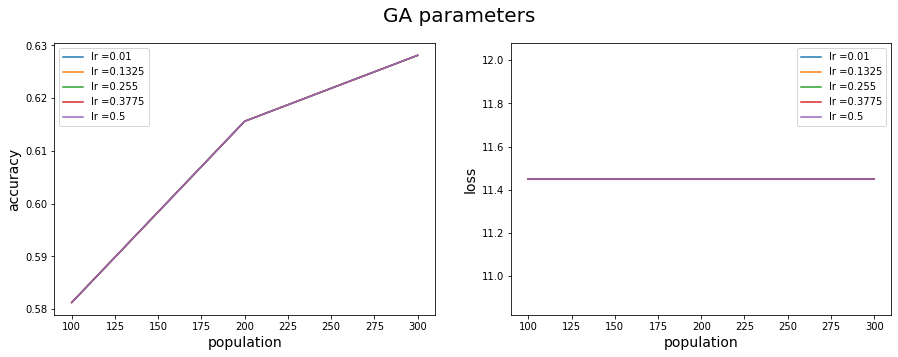

In [116]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('GA parameters',fontsize=20)

learning_rates = np.linspace(0.01, 0.50, 5)
populations = [100, 200, 300]

ax1.plot(populations, val_acc_ga.T)
# set x-axis label
ax1.set_xlabel("population",fontsize=14)
# set y-axis label
ax1.set_ylabel("accuracy",fontsize=14)
ax1.legend(["lr =0.01","lr =0.1325","lr =0.255","lr =0.3775","lr =0.5"],loc = "middle left")



# make a plot with different y-axis using second axis object
ax2.plot(populations, val_loss_ga.T)
ax2.set_ylabel("loss",fontsize=14)
ax2.set_xlabel("population",fontsize=14)
ax2.legend(["lr =0.01","lr =0.1325","lr =0.255","lr =0.3775","lr =0.5"],loc = "middle left")

Average Time 117.65182266235351
Time: [[ 72.29576659 111.86801481 166.90468335]
 [ 64.91461229 124.52216387 169.165447  ]
 [ 68.17069697 116.29428792 174.18296909]
 [ 71.03715992 126.23542547 166.92536449]
 [ 62.87602687 107.69380236 161.69091892]]
Test Accuracy: 0.628125
Confusion Matrix: [[ 85  75]
 [ 44 116]]


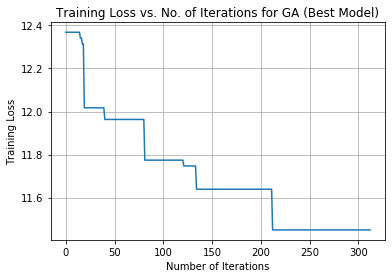

In [110]:
plt.figure()
plt.plot(nn_model_ga_best.fitness_curve[:,0])
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. No. of Iterations for GA (Best Model)')
plt.savefig('nn_train_iterations_curve_ga_best.png')

y_test_pred_ga = nn_model_ga_best.predict(X_test)
confusion_matrix_ga = confusion_matrix(y_test, y_test_pred_ga)

print("Average Time", np.mean(time_ga))
print("Time:", time_ga)
print("Test Accuracy:", test_acc_ga[ga_best_idx1][ga_best_idx2])
print("Confusion Matrix:", confusion_matrix_ga)

In [119]:
schedules = [mlrose.GeomDecay(), mlrose.ExpDecay(), mlrose.ArithDecay()]
val_loss_sa_best= 1
val_acc_sa_best = 0
learning_rates = np.linspace(0.01, 0.50, 5)
train_acc_sa = np.zeros((len(learning_rates),len(schedules)))
time_sa = np.zeros((len(learning_rates),len(schedules)))
test_acc_sa= np.zeros((len(learning_rates),len(schedules)))
val_acc_sa= np.zeros((len(learning_rates),len(schedules)))
val_loss_sa= np.zeros((len(learning_rates),len(schedules)))


nn_model_sa_best = mlrose.NeuralNetwork(hidden_nodes = [10,10], activation ='tanh', 
                                        algorithm ='simulated_annealing', 
                                        max_iters = 1000, bias = True, is_classifier = True, 
                                        learning_rate = 0.00001, early_stopping = True, 
                                        max_attempts = 100, random_state = 2, curve = True)

for idx1, learning_rate in enumerate(learning_rates):
    for idx2, schedule in enumerate(schedules):
        nn_model_sa = mlrose.NeuralNetwork(hidden_nodes = [10,10], activation ='tanh', 
                                        algorithm ='simulated_annealing', 
                                        max_iters = 1000, bias = True, schedule = schedule, is_classifier = True, 
                                        learning_rate = learning_rate, early_stopping = True, 
                                        max_attempts = 100, random_state = 2, curve = True)

        start = time.time()
        nn_model_sa.fit(X_train, y_train)
        end = time.time()
        time_sa_current = end - start

        y_train_pred_sa = nn_model_sa.predict(X_train)
        y_train_accuracy_sa = accuracy_score(y_train, y_train_pred_sa)
        train_acc_sa[idx1][idx2] = y_train_accuracy_sa

        y_val_pred_sa = nn_model_sa.predict(X_val)
        y_val_accuracy_sa = accuracy_score(y_val, y_val_pred_sa)
        val_acc_sa[idx1][idx2]= y_val_accuracy_sa
        val_loss_sa[idx1][idx2]= nn_model_sa.loss

        y_test_pred_sa = nn_model_sa.predict(X_test)
        y_test_accuracy_sa = accuracy_score(y_test, y_test_pred_sa)
        test_acc_sa[idx1][idx2] = y_test_accuracy_sa
        time_sa[idx1][idx2]= time_sa_current
        
        print(learning_rate,schedule)
        print("y_val_accuracy_sa",y_val_accuracy_sa)
        print("nn_model_sa loss",nn_model_sa.loss)

        if y_val_accuracy_sa > val_acc_sa_best or (y_val_accuracy_sa == val_acc_sa_best and nn_model_sa.loss<val_loss_sa_best):
                nn_model_sa_best = nn_model_sa
                print("Learning Rate:", learning_rate)
                print("Schedule:", idx2)
                print("Time:", time_sa_current)
                sa_best_idx1 = idx1
                sa_best_idx2 = idx2
                val_acc_sa_best = y_val_accuracy_sa
                val_loss_sa_best

0.01 1.0
y_val_accuracy_sa 0.496875
nn_model_sa loss 0.718133950529022
Learning Rate: 0.01
Schedule: 0
Time: 2.702003002166748
0.01 1.0
y_val_accuracy_sa 0.496875
nn_model_sa loss 0.7246437100894584
Learning Rate: 0.01
Schedule: 1
Time: 2.8550000190734863
0.01 1.0
y_val_accuracy_sa 0.496875
nn_model_sa loss 0.7271725886615906
Learning Rate: 0.01
Schedule: 2
Time: 3.4609875679016113
0.1325 1.0
y_val_accuracy_sa 0.553125
nn_model_sa loss 0.661173931401347
Learning Rate: 0.1325
Schedule: 0
Time: 2.42903208732605
0.1325 1.0
y_val_accuracy_sa 0.5
nn_model_sa loss 0.7053292316193038
0.1325 1.0
y_val_accuracy_sa 0.5
nn_model_sa loss 0.8234720867988417
0.255 1.0
y_val_accuracy_sa 0.625
nn_model_sa loss 0.6514506166571747
Learning Rate: 0.255
Schedule: 0
Time: 2.3142426013946533
0.255 1.0
y_val_accuracy_sa 0.58125
nn_model_sa loss 0.6774101995667612
0.255 1.0
y_val_accuracy_sa 0.5625
nn_model_sa loss 1.1613452186199587
0.3775 1.0
y_val_accuracy_sa 0.584375
nn_model_sa loss 0.64693869679704
0.37

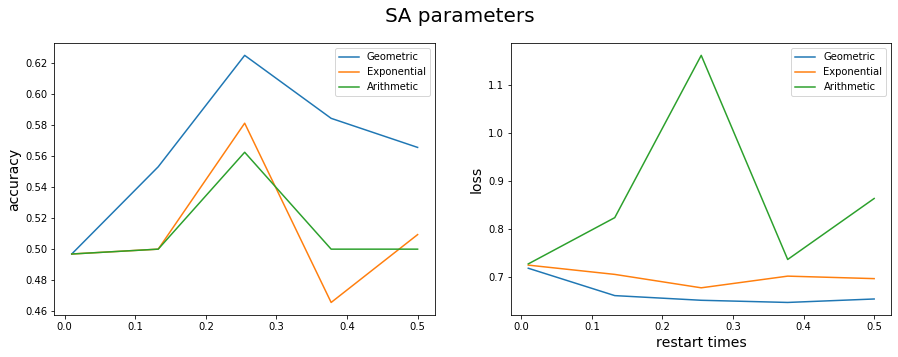

In [123]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('SA parameters',fontsize=20)

learning_rates = np.linspace(0.01, 0.50, 5)

ax1.plot(learning_rates, val_acc_sa)
# set x-axis label
ax1.set_xlabel("",fontsize=14)
# set y-axis label
ax1.set_ylabel("accuracy",fontsize=14)
ax1.legend(["Geometric","Exponential","Arithmetic"],loc = "middle left")



# make a plot with different y-axis using second axis object
ax2.plot(learning_rates, val_loss_sa)
ax2.set_ylabel("loss",fontsize=14)
ax2.set_xlabel("restart times",fontsize=14)
ax2.legend(["Geometric","Exponential","Arithmetic"],loc = "middle left")


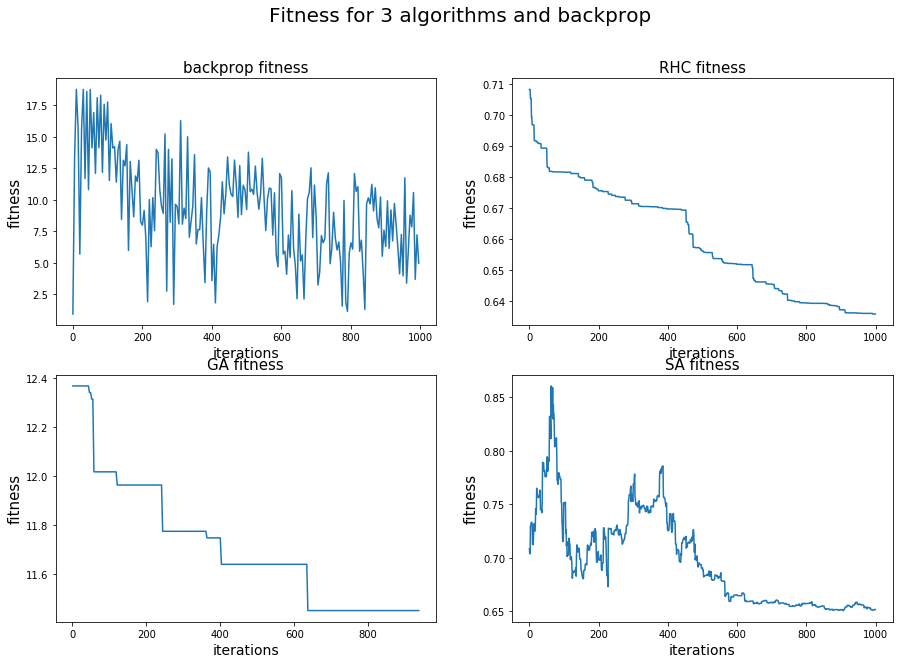

In [129]:
#pic for 4 parameters
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(15)
fig.suptitle('Fitness for 3 algorithms and backprop',fontsize=20)

index =range(0,1000,5)
ax1.plot(index,-nn_model_backprop_best.fitness_curve[index])
ax1.set_xlabel("iterations",fontsize=14)
ax1.set_ylabel("fitness",fontsize=15)
ax1.set_title("backprop fitness",fontsize = 15)


ax2.plot(nn_model_rhc_best.fitness_curve[:,0])
ax2.set_xlabel("iterations",fontsize=14)
ax2.set_ylabel("fitness",fontsize=15)
ax2.set_title("RHC fitness",fontsize = 15)

index3 =range(1,940,3)
ax3.plot(index3,nn_model_ga_best.fitness_curve[:,0])
ax3.set_xlabel("iterations",fontsize=14)
ax3.set_ylabel("fitness",fontsize=15)
ax3.set_title("GA fitness",fontsize = 15)

ax4.plot(nn_model_sa_best.fitness_curve[:,0])
ax4.set_xlabel("iterations",fontsize=14)
ax4.set_ylabel("fitness",fontsize=15)
ax4.set_title("SA fitness",fontsize = 15)

fig.savefig("NN-fitness")

In [130]:
print("Average Time", np.mean(time_backprop))
print("Average Time", np.mean(time_rhc))
print("Average Time", np.mean(time_ga))
print("Average Time", np.mean(time_sa))

Average Time 2.5929766416549684
Average Time 19.02544328689575
Average Time 117.65182266235351
Average Time 2.733656104405721
